<h2 style="text-align:center;font-weight:bold">Dataset on APS failure in Scania trucks: predicting when servicing is necessary.</h2>

<h2 style="text-align:center;font-weight:bold">Business understanding  </h2>

The dataset consists of information collected from Scania heavy trucks in daily use. Specifically, the focus is on the Air Pressure System (APS), which generates pressurized air used in various functions of the truck, including braking and gear shifting. The dataset has a positive class, consisting of failures of specific components of the APS system, and a negative class, consisting of trucks with failures in components not related to APS. It is important to note that the data has been selected by experts and is a subset of the available data.

The objective of this project is to minimize the cost associated with unnecessary checks made by mechanics, which cost (10 dollars), and maintenance failures, which can result in breakdowns with a cost of  (500 dollars). To achieve this goal, the main objective is to correctly predict whether the truck needs maintenance or not, in order to minimize the number of unnecessary checks and avoid possible breakdowns.

In addition to the exploratory analysis and data preparation techniques, this report also seeks to address the issue of the Curse of Dimensionality. We will discuss the impact of dimensionality on the accuracy of machine learning models and introduce methods to mitigate its effects, such as feature selection and dimensionality reduction techniques like PCA. By applying these methods, we aim to ensure that our analysis is not only accurate but also interpretable and useful for decision-making purposes.

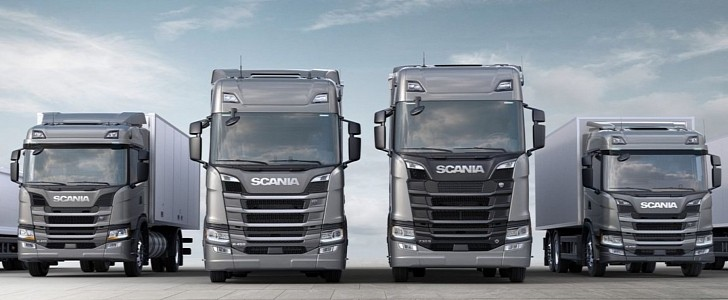

### Libraries

In [1]:
# Suppress warnings.
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package.
import numpy as np
import pandas as pd

# Data preparation.
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA

# Modeling.
from sklearn.model_selection import train_test_split

# Visualisation Libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 

<h3 style="text-align:center;font-weight:bold">EDA/ Data Visualizations</h3>

In [2]:
# Checking missing value formats and read data.
missing_value_formats = ["na", "n.a.", "?", "NA", "n/a", "--"]
df = pd.read_csv("aps_failure_set.csv", na_values=missing_value_formats)

# Checking missing values.
nan_percentages = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
print("NaN percentage in the DataFrame: {:.2f}%".format(nan_percentages))

# Display first and last 5 records.
display(df.head())
display(df.tail())
print("Shape of the dataset:", df.shape) # Display shape.
print("\nInformation about the dataset:\n")
df.info()# Returns the info.

NaN percentage in the DataFrame: 8.28%


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0
59999,neg,40222,NaN,6.980000e+02,628.0,0.0,0.0,0.0,0.0,0.0,...,440066.0,183200.0,344546.0,254068.0,225148.0,158304.0,170384.0,158.0,0.0,0.0


Shape of the dataset: (60000, 171)

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In the initial data exploration, it was observed that the column names did not provide any relevant information related to the subject domain. The only column that contained relevant information was the "class" column, which distinguished between positive and negative results for trucks signaling a defect in their APS equipment. The dataset is relatively large, containing 6000 rows and 171 columns, and missing values were observed:

* NaN percentage in the DataFrame: 8.28%
    
* Shape of the dataset: (60000, 171)

It is worth noting that, apart from the "class" column, the dataset is entirely composed of numeric variables:

* dtypes: float64(169), int64(1), object(1)

### Checking the dependent variable

As we can see in the previous code, the first column of the dataframe contains the dependent variable "Class", which is currently in object format. However, machine learning models require numeric input variables, so the next step is to encode this variable into numeric values. This process is known as label encoding, where each unique category in the column is assigned a numerical value. Once the encoding is complete, the variable will be transformed from an object to an integer type, making it suitable for use in a machine learning model.

Number of positive class: 1000
Number of negative class: 59000


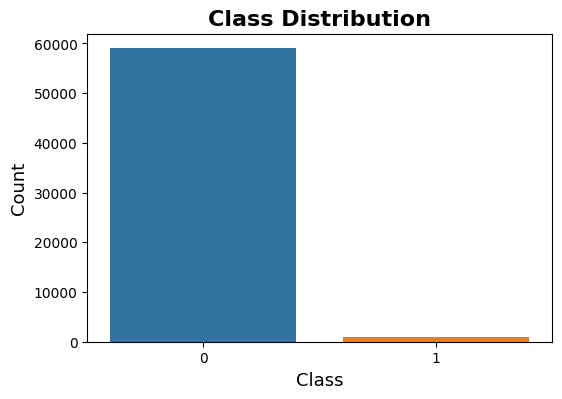

In [3]:
# Encode the class labels as numerical values.
lab = LabelEncoder() # Data preparation.
df["class"] = lab.fit_transform(df["class"])

# Print the number of positive and negative classes
print("Number of positive class:", df["class"].value_counts()[1])
print("Number of negative class:", df["class"].value_counts()[0])

# Plot the class distribution.
plt.figure(figsize=(6, 4))
sns.barplot(x=df["class"].unique(), y=df["class"].value_counts())
plt.title("Class Distribution", fontsize=16, fontweight='bold', ha='center')
plt.xlabel("Class", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.show()

The "class" variables in the dataset are unbalanced, with one class significantly outnumbering the other. This can have negative impacts on the training of a machine learning model, as the model may have a bias towards the overrepresented class. However, this issue will be addressed and adjusted in future phases of the project. As believed by Harrison (2019 p.41) "If you are classifying data, and the classes are not relatively balanced in size, the bias toward more popular classes can carry over into your model."

### Checking for duplicate rows and missing values

As mentioned before, the dataset under analysis contains missing values, which account for almost 10% of the total observations. In order to better understand the distribution of these missing values across the different columns, we will visualize them using a heatmap. 

Given the relatively large size of the dataset, the heatmap provides an efficient and visually appealing way to identify missing values, which are highlighted in blue. By analyzing the heatmap, it is possible to gain insights into the distribution of missing values in the dataset, which can inform subsequent data cleaning and imputation strategies.

No duplicate rows were found in the dataset.

Null values per column:
class         0
aa_000        0
bt_000      167
ck_000      338
cj_000      338
          ...  
cr_000    46329
bo_000    46333
bp_000    47740
bq_000    48722
br_000    49264
Length: 171, dtype: int64

Percentage of null values per column:
class      0.00
aa_000     0.00
bt_000     0.28
ck_000     0.56
cj_000     0.56
          ...  
cr_000    77.22
bo_000    77.22
bp_000    79.57
bq_000    81.20
br_000    82.11
Length: 171, dtype: float64


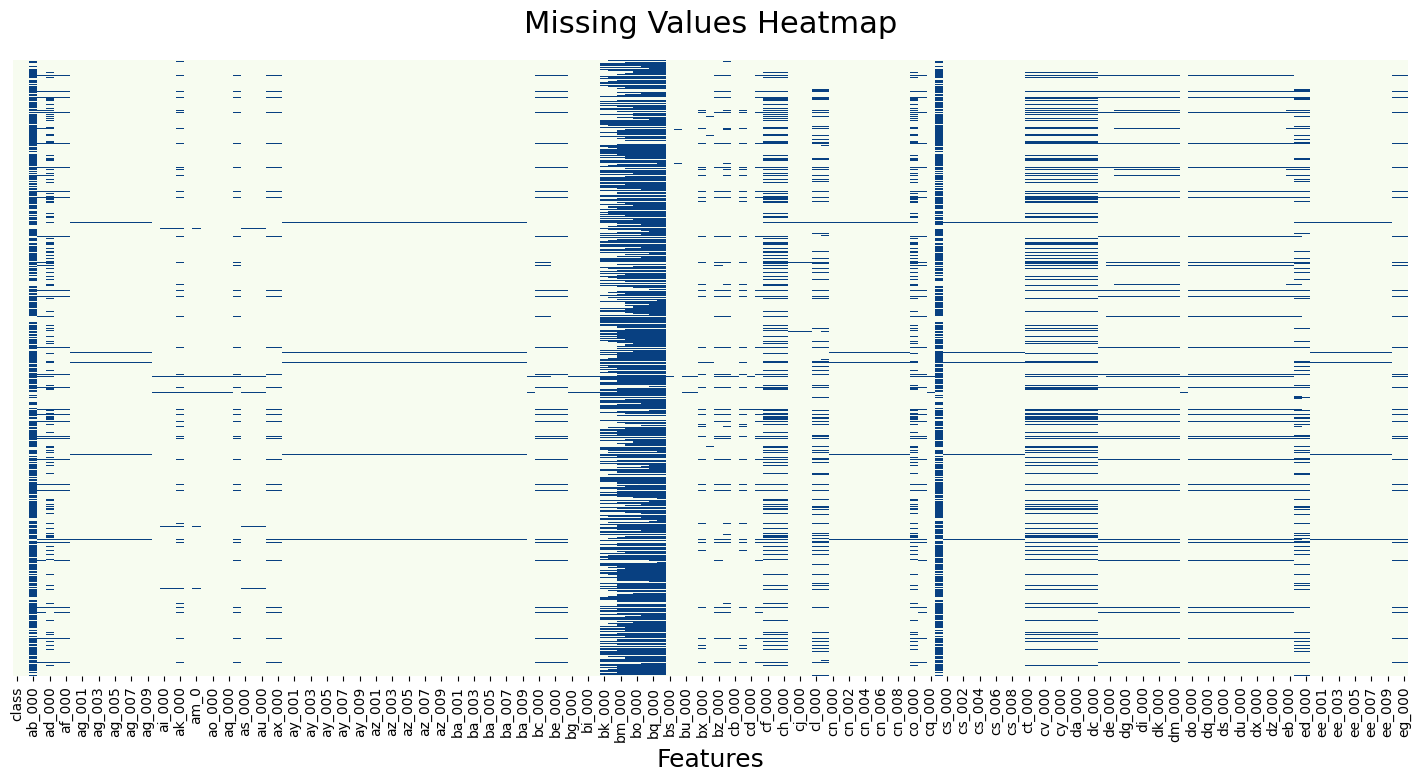

In [4]:
# Check for duplicate rows.
duplicate_rows_df = df[df.duplicated()]

# Print the number of duplicate rows found and additional information.
if duplicate_rows_df.shape[0] > 0:
    print("The dataset contains", duplicate_rows_df.shape[0], "duplicate rows before dropping them.")
    print("Here are the first few duplicate rows:")
    print(duplicate_rows_df.head())
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been dropped from the dataset.")
else:
    print("No duplicate rows were found in the dataset.")

# Check for null values.
null_values = df.isnull().sum().sort_values()

# Calculate the percentage of null values per column.
null_percentage = round((null_values / len(df)) * 100, 2)

# Print the number and percentage of null values found for each column.
print("\nNull values per column:")
print(null_values)
print("\nPercentage of null values per column:")
print(null_percentage)

# Missing Values Heatmap.
plt.figure(figsize=(18,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='GnBu')
plt.xlabel('Features', fontsize=18)
plt.xticks(rotation=90)
plt.title('Missing Values Heatmap', fontsize=22, pad=20, ha='center')
plt.show()

As observed in the previous analysis, certain columns contain a substantial number of missing values:

    cr_000    77.22
    bo_000    77.22
    bp_000    79.57
    bq_000    81.20
    br_000    82.11

To address this issue, appropriate imputation techniques will be applied during the data preparation stage. It is crucial to handle these missing values to ensure the accuracy and effectiveness of the machine learning model during prediction. Neglecting these values can have a detrimental impact on the learning process and subsequent predictions.

### Checking Outliers

The count_outliers function aims to identify outliers in a DataFrame df by calculating the interquartile range (IQR) and setting a threshold for outlier detection. It counts the number of outliers and calculates their percentage for each variable. The function provides insights into potential anomalies or errors in the data, aiding in data analysis and anomaly detection.

In [5]:
def count_outliers(df):
    # Calculate the interquartile range (IQR).
    q1 = df.drop(["class"], axis=1).quantile(0.25)
    q3 = df.drop(["class"], axis=1).quantile(0.75)
    iqr = q3 - q1
    
    # Define the threshold for outliers.
    threshold = 1.5 * iqr
    
    # Count the number of outliers for each variable.
    outliers = pd.DataFrame()
    for col in df.drop(["class"], axis=1).columns:
        lower = q1[col] - threshold[col]
        upper = q3[col] + threshold[col]
        count = len(df[(df[col] < lower) | (df[col] > upper)])
        percentage = round(100 * count / len(df), 2)
        outliers[col] = [count, percentage]
    
    # Sort the DataFrame by ascending outlier count.
    outliers = outliers.T.sort_values(by=0)
    outliers.columns = ['Outliers', 'Percentage']
    
    return outliers

In [6]:
outliers = count_outliers(df)
print(outliers)

        Outliers  Percentage
br_000       0.0        0.00
bo_000       0.0        0.00
bp_000       0.0        0.00
bq_000       0.0        0.00
ca_000       0.0        0.00
...          ...         ...
cj_000   12540.0       20.90
ba_008   12580.0       20.97
dq_000   12870.0       21.45
dr_000   13007.0       21.68
az_007   14235.0       23.73

[170 rows x 2 columns]


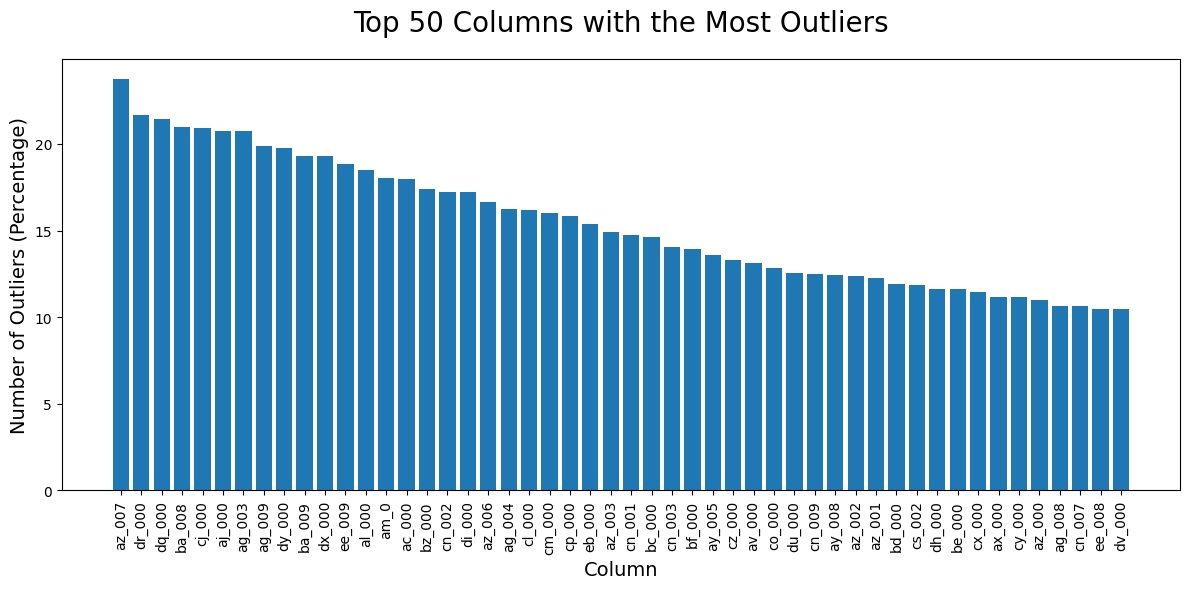

In [7]:
# Sort the Series in descending order and select the top 50 columns.
top_columns = outliers.sort_values(by='Percentage', ascending=False).head(50).index.tolist()
outliers_values = outliers.loc[top_columns, 'Percentage']

# Create a bar plot.
plt.figure(figsize=(12, 6))  
plt.bar(top_columns, outliers_values)
plt.xlabel('Column',fontsize=14)
plt.ylabel('Number of Outliers (Percentage)',fontsize=14)
plt.title('Top 50 Columns with the Most Outliers',fontsize=20, pad=20, ha='center')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Another notable concern is the presence of outliers in certain columns of the dataset. This can be observed not only through the generated outlier percentage DataFrame from the function above but also more conveniently through the bar chart illustrating the quantity of these outliers in the top 50 columns. Taking into consideration the impact of these outliers appropriate measures will be implemented in the next steps.

# 

 <h2 style="text-align:center;font-weight:bold">Data preparation</h2>

### Handling missing values

By employing the median imputation technique and filling in the missing values in the data frame, we have chosen the median as the parameter for data filling. This choice is due to the fact that the mean can be influenced by extreme values, which is the case with several columns in our dataset. The median, on the other hand, is a more robust measure that is not affected by outliers, making it suitable for skewed distributions. This approach ensures that the imputed values are more representative of the central tendency of the data, enhancing the accuracy of our analysis.

In [8]:
# Impute missing values with median.
imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(df)

# Check for missing values in the imputed dataset.
if np.isnan(df_imputed).any():
    print("The imputed dataset contains missing values.")
else:
    print("The imputed dataset has no missing values.")

The imputed dataset has no missing values.


### Checking the sparsity

After data processing, it is important to analyze the sparsity of the dataset. Although there is no clear definition of the threshold beyond which a dataset or matrix is considered sparse, some experts consider that if approximately half or more of the observations are zero, then the dataset is sparse. (Duff, Erisman, & Reid, 2017)

In [9]:
def sparsity_density(df):
    non_zero = np.count_nonzero(df)
    total_val = np.product(df.shape)
    sparsity = (total_val - non_zero) / total_val
    density = non_zero / total_val
    
    print("Density:  ", density)
    print("Sparsity: ", sparsity)

# Calculating the percentage with the function.
sparsity_density(df_imputed) # Confirming if data is sparse.

# Checking if the data is sparse
from scipy import sparse
if sparse.issparse(df_imputed):
    print("This dataframe is sparse.")
else:
    print("This dataframe is not sparse.")

Density:   0.653259746588694
Sparsity:  0.34674025341130604
This dataframe is not sparse.


### Splitting the into Training Set and Test Set

To prepare data for a machine learning model, it is essential to split it into independent and dependent variables. As suggested by Müller and Guido (2017), we can use the train_test_split function to split the data into training and test sets. This allows us to train the model on one part of the data and test it on another part to evaluate its performance on new and unseen data. This process helps in avoiding overfitting and provides a better understanding of how the model generalizes to new data.

*Note: By applying data preparation techniques such as scaling and dimensionality reduction with PCA after splitting the training and test sets, you ensure that the transformations are performed based on the patterns learned from the training data. This helps avoid any leakage of information from the test set into the preprocessing models, which could result in overly optimistic evaluation metrics. By transforming the test set using the patterns obtained from the training set, you maintain the integrity of the evaluation process and ensure that the model is tested on unseen data.*

As stated by Brownlee (2020) "The problem with applying data preparation techniques before splitting data for model evaluation is that it can lead to data leakage and, in turn, will likely result in an incorrect estimate of a model’s performance on the problem."

According to Zheng and Casari (2018, p.93) "...leakage means that information is revealed to the model that gives it an unrealistic advantage to make better predictions. This could happen when test data is leaked into the training set, or when data from the future is leaked to the past. Any time that a model is given information that it shouldn’t have access to when it is making predictions in real time in production, there is leakage. "

In [10]:
# For machine learning model, we need to split the data into independent and dependent variables.
X = df_imputed  # Independent variables.
y = df["class"] # Dependent variable.

# Split dataset into training and test sets (70:30 split).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of training and test data along with their labels.
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

Total number of rows and columns for the complete dataset:  (60000, 171) (60000,)
X_train shape: (42000, 171)
y_train shape: (42000,)
X_test shape: (18000, 171)
y_test shape: (18000,)


### Scaling the data

As mentioned by (Hale, 2019) most of the time before data is applied to a given machine learning model, it must be scaled,it brings all the samples in the same scale and range. This results in a better performance of the data in a machine learning model.

In [11]:
# Create scaler objects.
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
normalizer = Normalizer()

# Scale the data using each scaler.
X_train_scaled = minmax_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = minmax_scaler.transform(X_test.astype(np.float))

### Dimensionality Reduction (PCA, or Principal Component Analysis)

PCA, or Principal Component Analysis, is a commonly used technique in machine learning and data analysis. It is a dimensionality reduction method that transforms a high-dimensional dataset into a lower-dimensional one by identifying and removing redundant and irrelevant features. The goal of PCA is to reduce the complexity of the dataset while preserving its most significant features.

By doing so, PCA can help improve the performance of machine learning algorithms by reducing the amount of noise in the data, improving the accuracy of predictions, and speeding up the training process. Additionally, PCA can also aid in data visualization by reducing the number of dimensions and making it easier to plot and interpret.

In this project, PCA is applied to the training and testing data to reduce the dimensionality while retaining the essential features needed for the classification task. The resulting dataset is more efficient and easier to work with, which can lead to better model performance. The variance curve graph is an important tool to help determine the optimal number of principal components to keep, and in this project, 90% of the variance is retained.

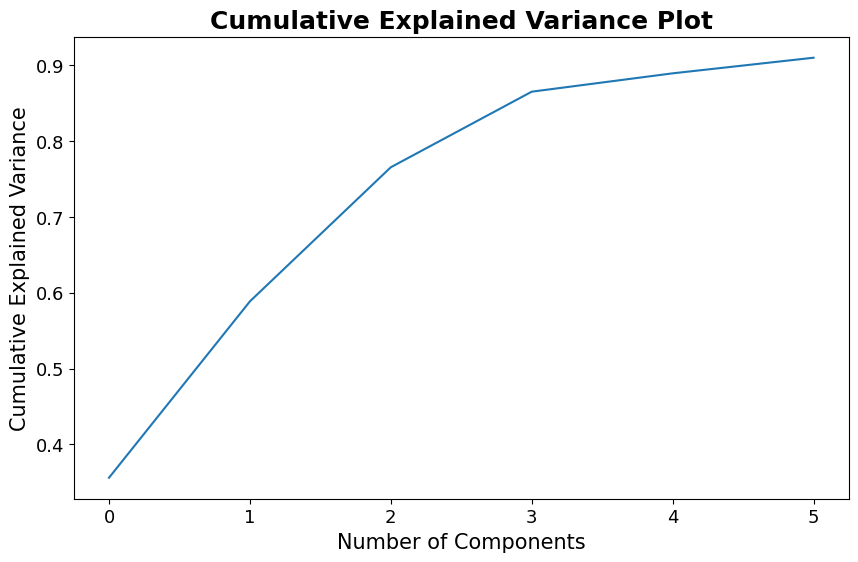

Shape of the dataframe before PCA: (42000, 171) (18000, 171)
Shape of the dataframe after PCA: (42000, 6) (18000, 6)


In [12]:
# Create a PCA object that explains 90% of the variance.
pca = PCA(n_components=0.9)

# Fit PCA on the scaled training and testing set.
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.title("Cumulative Explained Variance Plot", fontsize=18, fontweight="bold")
plt.xlabel("Number of Components", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

print("Shape of the dataframe before PCA:", X_train_scaled.shape, X_test_scaled.shape)
print("Shape of the dataframe after PCA:", X_train_pca.shape, X_test_pca.shape)

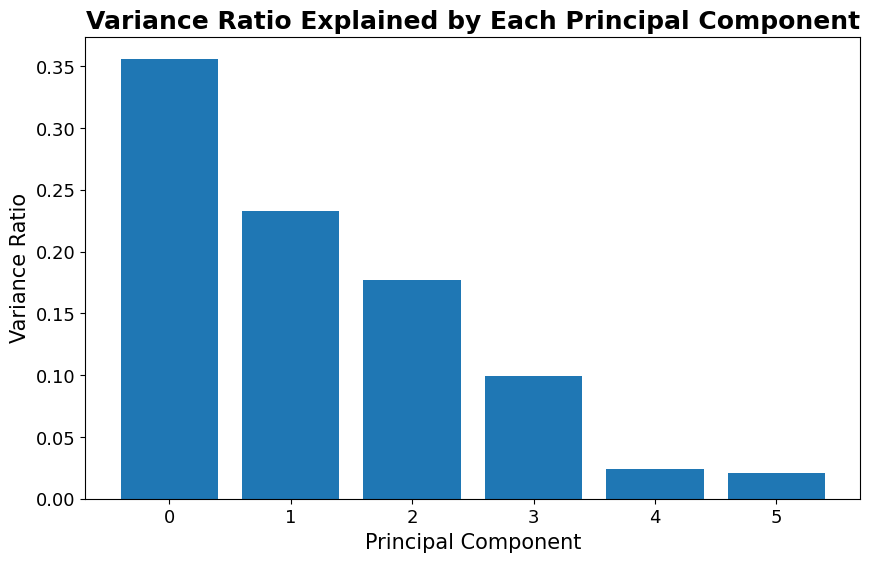

In [13]:
# Calculate the variance ratio explained by each principal component.
variance_ratio = pca.explained_variance_ratio_

# Create a bar graph to visualize the variance ratio explained by each principal component.
plt.figure(figsize=(10, 6))
plt.bar(range(len(variance_ratio)), variance_ratio)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Variance Ratio',fontsize=15)
plt.title('Variance Ratio Explained by Each Principal Component',fontsize=18, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

The "Cumulative Explained Variance" graph above shows that the dataset's 90% variation level is achieved by the 5th component. Meanwhile, the "Ratio of Variance Explained by Each Main Component" graph illustrates the distribution of variance across each component, with the majority of the variance accumulating in the first two components.

In [14]:
pca.explained_variance_ratio_

array([0.35614769, 0.23248682, 0.17682674, 0.09962664, 0.02418004,
       0.02058669])

<h2 style="text-align:center;font-weight:bold">Reference list</h2>

Brownlee, J. (2020). How to Avoid Data Leakage When Performing Data Preparation. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/data-preparation-without-data-leakage/.

Devireddy, S.K. (2021). Principal Component Analysis. [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/principal-component-analysis-754781cfb30f [Accessed 9 Nov. 2022].

Dickson, B. (2021). Machine learning: What is dimensionality reduction? [online] TechTalks. Available at: https://bdtechtalks.com/2021/05/13/machine-learning-dimensionality-reduction/ [Accessed 8 Nov. 2022].

docs.scipy.org. (n.d.). Sparse matrices (scipy.sparse) — SciPy v1.8.0 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/sparse.html.

Duff, I.S., Erisman, A.M. and John Ker Reid (2017). Direct methods for sparse matrices. New York: Oxford University Press.

Hale, J. (2019). Scale, Standardize, or Normalize with Scikit-Learn. [online] Medium. Available at: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02.

Harrison, M. (2019). Machine Learning Pocket Reference. ‘O’Reilly Media, Inc.’, p.41.

Müller, A.C. and Guido, S. (2017). Introduction to machine learning with Python : a guide for data scientists. Beijing: O’reilly.

Vanderplas, J.T. (2017). Python data science handbook : essential tools for working with data. Beijing Etc.: O’reilly, Cop.

Zheng, A. and Casari, A. (2018). Feature engineering for machine learning principles and techniques for data scientists. Beijing Boston Farnham O’reilly.